In [6]:
#Importing the packages

import torch
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Defining the Hyperparameters

input_size = 1
output_size = 1
num_epochs = 10000
learning_rate = 0.001

In [10]:
# Defining a Toy Dataset

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [11]:
# Linear Regression Model

model = nn.Linear(input_size, output_size)

# Loss Function:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# Training the Model

for epoch in range(num_epochs):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print("Epoch: {}/{}; \tLoss: {}".format(epoch + 1, num_epochs, loss.item()))

Epoch: 1000/10000; 	Loss: 0.1689731925725937
Epoch: 2000/10000; 	Loss: 0.1689499020576477
Epoch: 3000/10000; 	Loss: 0.16893599927425385
Epoch: 4000/10000; 	Loss: 0.1689276546239853
Epoch: 5000/10000; 	Loss: 0.16892266273498535
Epoch: 6000/10000; 	Loss: 0.16891971230506897
Epoch: 7000/10000; 	Loss: 0.16891790926456451
Epoch: 8000/10000; 	Loss: 0.16891691088676453
Epoch: 9000/10000; 	Loss: 0.16891618072986603
Epoch: 10000/10000; 	Loss: 0.16891583800315857


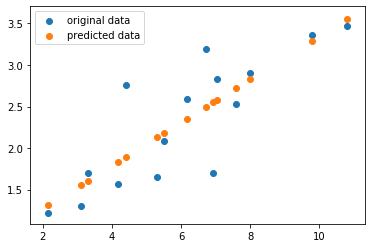

In [13]:
# Plotting the outputs

predicted = model(torch.from_numpy(x_train)).detach().numpy()

plt.scatter(x_train, y_train, label='original data')
plt.scatter(x_train, predicted, label='predicted data')
plt.legend()
plt.show()

In [14]:
# Logistic Regression Model

import torchvision
import torchvision.transforms as transforms

In [15]:
# Defining Hyperparameters

input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [16]:
# loding the Dataset

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train = False, transform=transforms.ToTensor(), download=True)

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


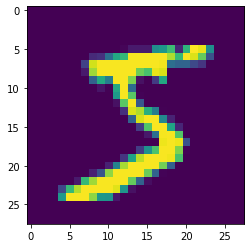

In [17]:
plt.imshow(train_dataset.train_data[0])
plt.show()

In [18]:
# Create DataLoader objects

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [19]:
model = nn.Linear(input_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
# Training the Model

total_step = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i + 1) % 200 == 0:
            print("Epoch: {}/{}, \tIteration: {}/{}, \tLoss: {}".format(epoch + 1, num_epochs, i + 1, len(trainloader), loss.item()))

Epoch: 1/20, 	Iteration: 200/600, 	Loss: 2.1737217903137207
Epoch: 1/20, 	Iteration: 400/600, 	Loss: 1.9851040840148926
Epoch: 1/20, 	Iteration: 600/600, 	Loss: 1.8113012313842773
Epoch: 2/20, 	Iteration: 200/600, 	Loss: 1.6676318645477295
Epoch: 2/20, 	Iteration: 400/600, 	Loss: 1.5788204669952393
Epoch: 2/20, 	Iteration: 600/600, 	Loss: 1.4989678859710693
Epoch: 3/20, 	Iteration: 200/600, 	Loss: 1.4068299531936646
Epoch: 3/20, 	Iteration: 400/600, 	Loss: 1.3580108880996704
Epoch: 3/20, 	Iteration: 600/600, 	Loss: 1.2886555194854736
Epoch: 4/20, 	Iteration: 200/600, 	Loss: 1.1504672765731812
Epoch: 4/20, 	Iteration: 400/600, 	Loss: 1.133836030960083
Epoch: 4/20, 	Iteration: 600/600, 	Loss: 1.16318678855896
Epoch: 5/20, 	Iteration: 200/600, 	Loss: 1.0855602025985718
Epoch: 5/20, 	Iteration: 400/600, 	Loss: 0.9450536370277405
Epoch: 5/20, 	Iteration: 600/600, 	Loss: 0.8941001296043396
Epoch: 6/20, 	Iteration: 200/600, 	Loss: 0.9588499665260315
Epoch: 6/20, 	Iteration: 400/600, 	Loss: 0.

In [21]:
# Testing the model

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.reshape(-1, 28 * 28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
    print("Accuracy of the model: {}".format(float(correct) / float(total)))

Accuracy of the model: 0.8646333333333334


In [22]:
# Feed Forward Neural Network Model



In [23]:
# Defining the network parameters

input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

In [24]:
# Create DataLoader Objects

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle = True)

In [25]:
# Device Configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
# Model definition

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
# Model definition

import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return out    

In [28]:

model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



In [29]:
# Training the Model

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 200 == 0:
            print("Epoch: {}/{};\tIteration: {}/{}; Loss: {}".format(epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self' in call to _thnn_nll_loss_forward

In [30]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)
print("Accuracy of the model {}".format(float(correct)/float(total)))

RuntimeError: CUDA error: an illegal memory access was encountered